<a href="https://colab.research.google.com/github/trushnes/Heart-Disease-Prediction/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Libraries Imported**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

from sklearn import metrics

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## **2. Dataset & its Pre-processing**

**Cleveland Heart Disease dataset** is downloaded from **UCI Machine Learning Repositary.** Dataset contains 75 attribtes. But every published experiment referred to using a subset of 14 of them. And thus we will also be using 14 attributes.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Path for dataset**

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Data/heart.csv'

**Function for loading the dataset from defined path and dividing attributes such that it gets stored in "data" & "data_target".**

In [ ]:
def load_data(data_path):
  data = pd.read_csv(data_path)
  target_name = 'target'
  data_target = data[target_name]
  data = data.drop([target_name], axis=1)
  return data, data_target

**Now dataset is splited into training, testing and validation part by 60:20:20 ratio.**

In [ ]:
data, data_target = load_data(DATA_PATH)
    #data = pd.read_csv('/content/sample_data/heart.csv')
    #target_name = 'target'
    #data_target = data[target_name]
    #data = data.drop([target_name], axis=1)

train, test, target, target_test = train_test_split(data, data_target, test_size=0.2)
    
mean = np.mean(train)
std = np.std(train)

    # normalization
train = (train-mean)/(std+1e-7)
test = (test-mean)/(std+1e-7)

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2)

**Function for plotting ACCURACY/LOSS FOR TRAINING/VALIDATION SET**

In [ ]:

def plot_history(history): # Training history of model
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Train - Accuracy')

## **3. ANN Model**

In [ ]:
def build_ann(optimizer='adam'):

    
    ann = Sequential()

    # Adding the input layer 
    ann.add(Dense(units=64, kernel_initializer='he_normal', activation='relu', input_shape=(len(train.columns),)))

    #Hidden Layer
    ann.add(Dense(units=64,activation = 'relu'))
  
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return ann

In [ ]:
print(len(train.columns),)

13


## **4. Runner Code**

In [ ]:
if __name__ == "__main__":

  #Xtrain, Xval, test, Ztrain, Zval, target_test = prepare_datasets(0.2, 0.2)
  #Creating Network
  opt = optimizers.Adam(lr=0.0001)
  ann = build_ann(opt)

  ann.summary()
  # Training the ANN
  history = ann.fit(Xtrain, Ztrain, batch_size=16, epochs=200, validation_data=(Xval, Zval))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 1s 18ms/step - loss: 0.9107 - accuracy: 0.3458 - val_loss: 0.9941 - val_accuracy: 0.2449
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8608 - accuracy: 0.4026 - val_loss: 0.9586 - val_accuracy: 0.2857
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.8060 - accuracy: 0.4403 

**PLOT FOR ACCURACY/LOSS FOR TRAINING/VALIDATION SET**

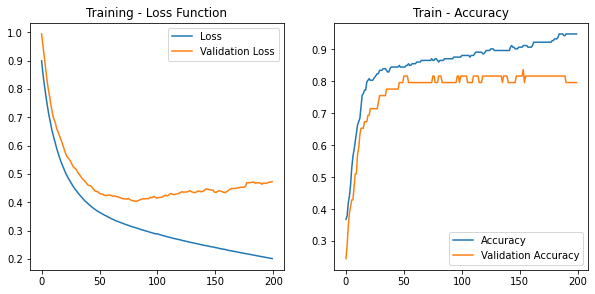

In [ ]:
plot_history(history)

## **5. Evaluation**

In [ ]:
# evaluate model on test set
test_loss, test_acc = ann.evaluate(test, target_test, verbose=0)
print('\nTest accuracy:', test_acc)
print('\nTest loss: ',test_loss)


Test accuracy: 0.8360655903816223

Test loss:  0.3299190402030945


## **6. Confusion Matrix**

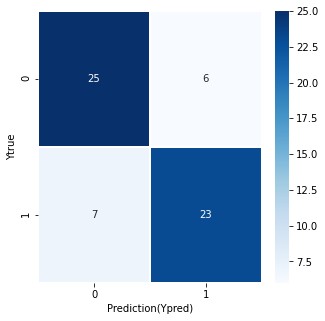

In [ ]:
yprediciton= ann.predict(test)

yprediciton = (yprediciton > 0.5)*1 

ytrue = target_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="white",fmt=".0f",ax=ax, cmap=plt.cm.Blues)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

## **7. Predictions**

In [ ]:
# Predicting the Test set results
ann_prediction_test = ann.predict(test)
ann_prediction_test = (ann_prediction_test > 0.5)*1 # convert probabilities to binary output

In [ ]:
# Compute error between predicted data and true response and display it in confusion matrix
acc_test_ann1 = round(metrics.accuracy_score(target_test, ann_prediction_test) * 100, 2)
print(acc_test_ann1)

78.69
